# Initialize

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qick import QickConfig
import sys 
sys.path.append('..\\')
from scresonators.fit_resonator.ana_resonator import ResonatorFitter
from scresonators.fit_resonator.ana_resonator import ResonatorData
from scresonators.measurement import vna_measurement
from scresonators.measurement import vaunix_da
import slab_qick_calib.config as config
from slab_qick_calib.exp_handling.instrumentmanager import InstrumentManager
import slab_qick_calib.experiments as meas

use_atten = True
%load_ext autoreload
%autoreload 2

# Configuration
ip = '10.108.30.23'
expt_path = 'C:\\_Data\\Terracat\\2025-04-28\\'
cfg_file='Terracat2.yml'

# Set seaborn color palette
colors = ["#0869c8", "#b51d14", '#ddb310', '#658b38', '#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

# Figure parameters
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 13})

print('Data will be stored in', expt_path)

if use_atten: 
    attn_id = vaunix_da.get_vaunix_atten(8)

# Results config file
cfg_path = os.path.join(os.getcwd(), 'configs', cfg_file)
auto_cfg = config.load(cfg_path)

# Connect to instruments
im = InstrumentManager(ns_address=ip)
print(im)
soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)
cfg_dict = {'soc': soc, 'expt_path': expt_path, 'cfg_file': cfg_path, 'im': im}

imported experiments.single_qubit.active_reset
imported experiments.single_qubit.inactive
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.rabi
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.single_shot
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_cont
imported experiments.single_qubit.t1_stark
imported experiments.single_qubit.t2
imported experiments.single_qubit.t2_ramsey_stark
imported experiments.single_qubit.tof_calibration
imported experiments.two_qubit.rabi_2q
imported experiments.two_qubit.t1_2q
imported experiments.two_qubit.t1_2q_cont
imported experiments.two_qubit.t1_2q_conttest
imported experiments.single_qubit.active_reset
imported experiments.single_qubit.inactive
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.rabi
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.single_

# Set up new config

In [ ]:
import os
import slab_qick_calib.config as config
new_config = False
new_folder = False
expt_path = 'C:\\_Data\\Terracat\\'
cfg_file='Terracat2.yml'

if new_config or new_folder:
    if not os.path.exists(os.getcwd() + '\\configs\\'):
        os.makedirs( os.getcwd() + '\\configs\\')
    if new_config:
        config.init_config_res( os.getcwd() + '\\configs\\' + cfg_file, 8, type='full', aliases='bf1_soc')

    if not os.path.exists(expt_path):
        os.makedirs(expt_path)

# TOF

  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\Terracat\2025-04-28\adc_trig_offset_calibration_qubit0_00008.h5


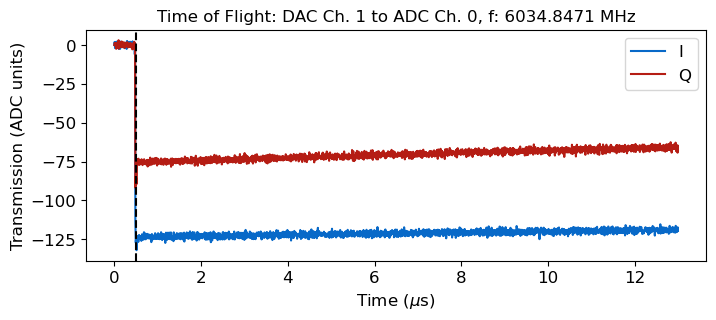

  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\Terracat\2025-04-28\adc_trig_offset_calibration_qubit0_00009.h5


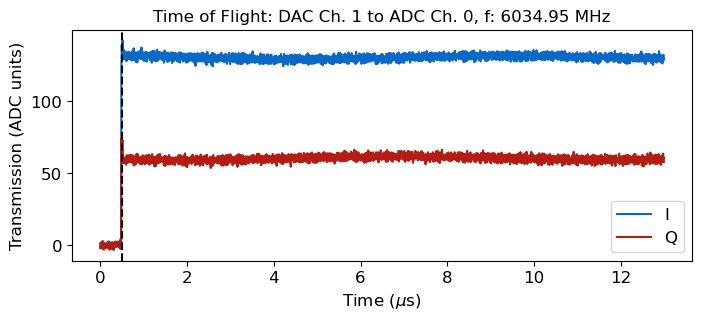

In [134]:
qubit_list = [0]
for qi in qubit_list:  
        #tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi)
        tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13})#,params={'frequency':fi})
        tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13,'frequency':6034.95})
        # use this to set trig_offset in config file

# Coarse

  0%|          | 0/40000 [00:00<?, ?it/s]

Number of peaks: 0


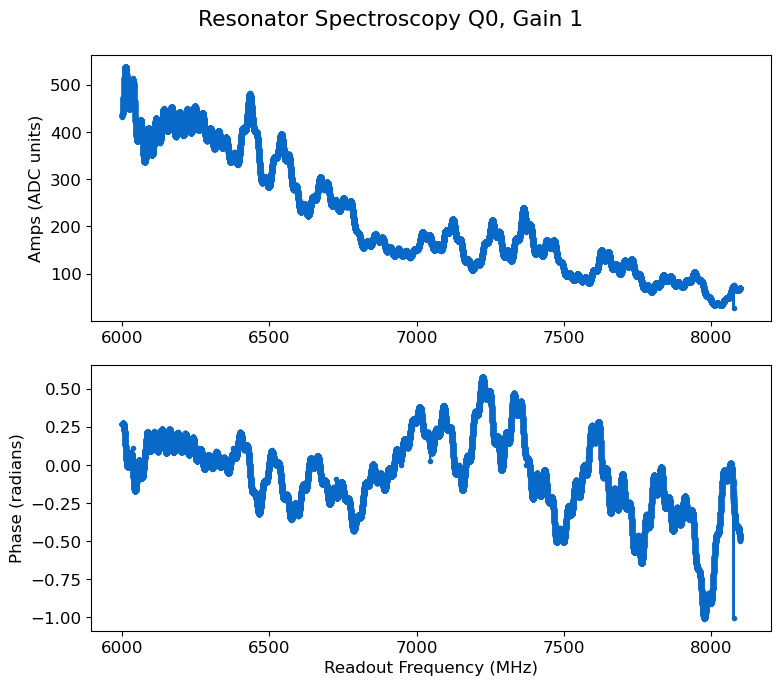

In [5]:
rspecc = meas.ResSpec(cfg_dict, qi=0, style='coarse', params={'start':6000, 'span':2100, 'soft_avgs':1, 'reps':1, 'gain':1, 'expts':40000,'length':500})

In [ ]:
#rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, im=im, start=6000, span=800, reps=2000, npts=5000)
qi=0
rspecc = meas.ResSpec(cfg_dict, qi=qi, style='coarse', params={'start':6000, 'span':2100, 'soft_avgs':1, 'reps':10, 'gain':1, 'expts':1000,'length':200})
res_values = rspecc.data['coarse_peaks']


  0%|          | 0/10000 [00:00<?, ?it/s]

Number of peaks: 4


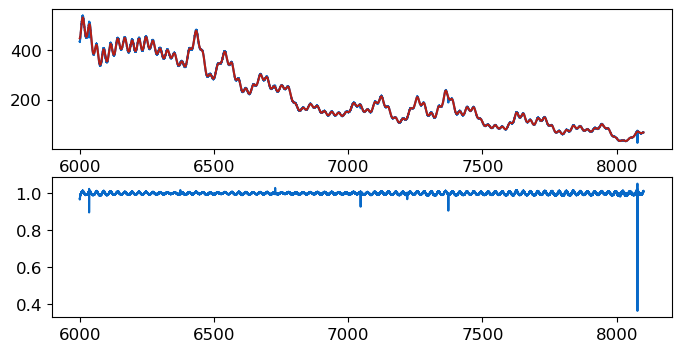

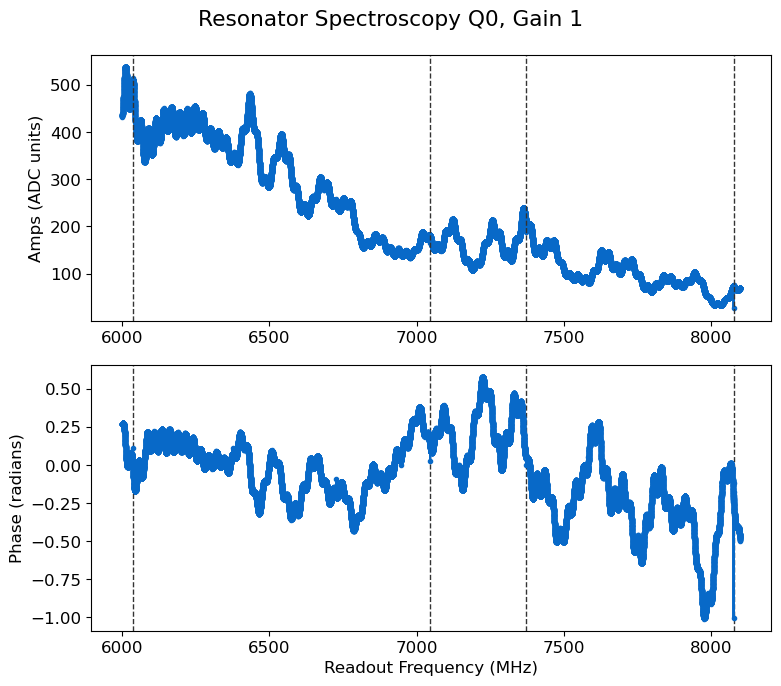

In [6]:
rspecc.analyze(peaks=True, debug=True, fit=False, prom=0.05)
rspecc.display(peaks=True, fit=False)
res_values = rspecc.data['coarse_peaks']

In [ ]:
res_values = np.delete(res_values,1)

# Res fine

C:\_Lib\python\qq\slab_qick_calib\experiments\single_qubit\resonator_spectroscopy.py:320: SyntaxWarning: invalid escape sequence '\k'
  label += f" \n$f$: {data['fit'][0]:.2f} MHz"


  0%|          | 0/28 [00:00<?, ?it/s]

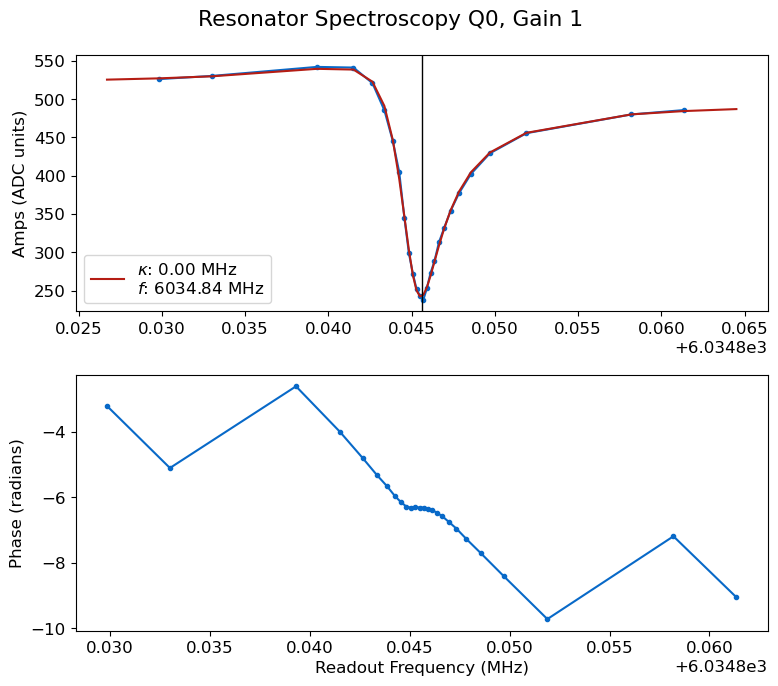

*Set cfg readout 0 frequency to 6034.8457 from 6034.8456*
*Set cfg readout 0 kappa to 0.0035 from 0.0036*
*Set cfg readout 0 qi to 415.2886 from 404.5768*
*Set cfg readout 0 qe to 292.7242 from 288.3468*


In [43]:
import cProfile
import pstats
import io

update=True

# Code to profile
qubit_list = np.arange(8)
qubit_list=[0]
for qi in qubit_list:    
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':0.1, 'center':res_values[qi], 'gain':1,'reps':4,'length':500}) # Use this to sweep through the res_values list
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','reps':1,'gain':1,'length':5000,'loop':True,'phase_const':True,'expts':28})
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':0.1,'long_pulse':True,'gain':1,'length':500})
    if update: rspec.update(cfg_dict['cfg_file'])


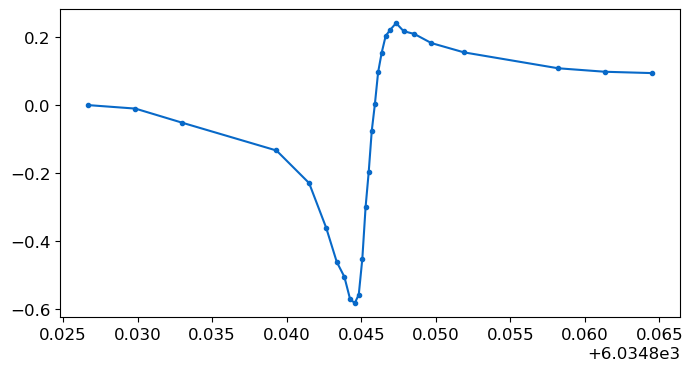

In [44]:
cfg = config.load(cfg_path)
fix_phase = rspec.data['phases']-cfg.device.readout['phase_inc']*rspec.data['xpts']
rspec.data['phases']= np.unwrap(fix_phase)-np.unwrap(fix_phase)[0]
rspec.data['amps']=20*np.log10(rspec.data['amps'])

plt.figure()
plt.plot(rspec.data['xpts'],rspec.data['phases'],'.-')

  0%|          | 0/11000 [00:00<?, ?it/s]

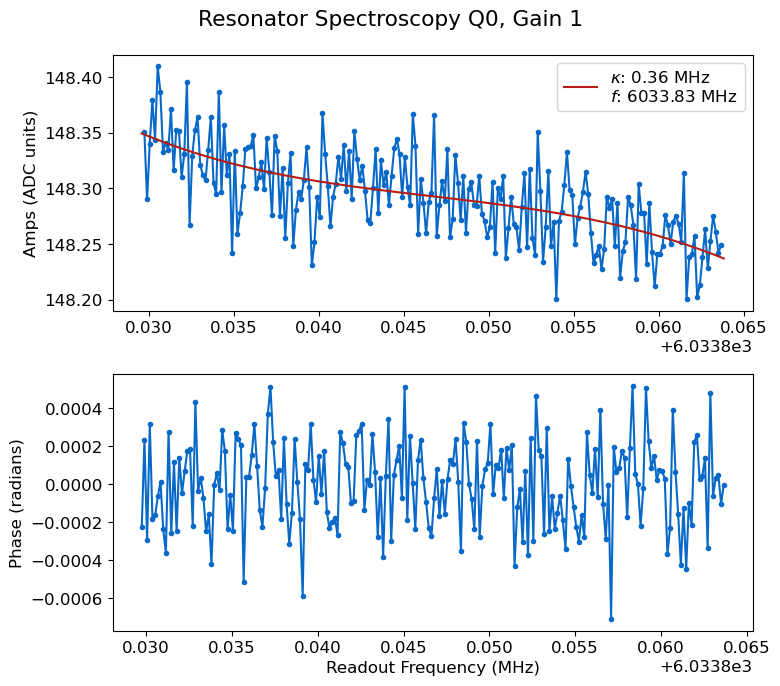

  0%|          | 0/11000 [00:00<?, ?it/s]

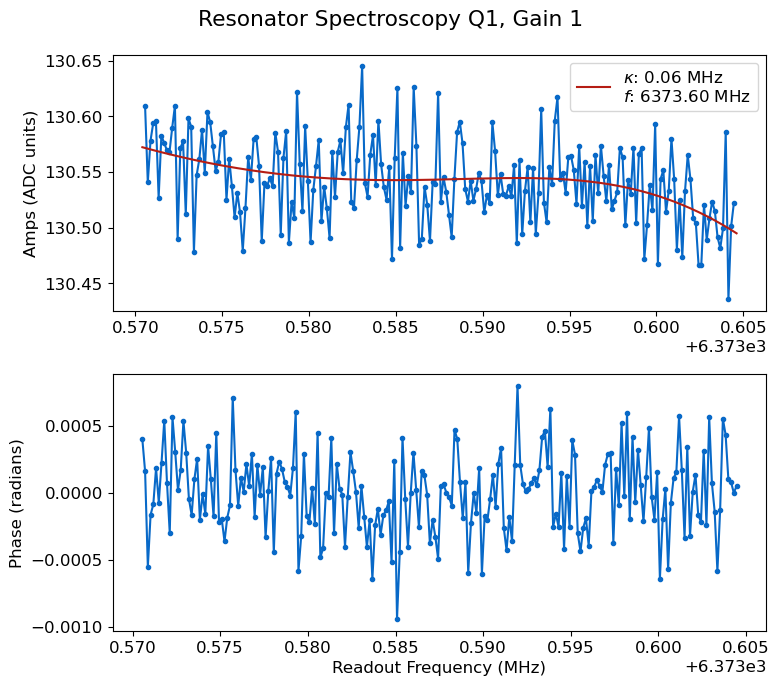

  0%|          | 0/11000 [00:00<?, ?it/s]

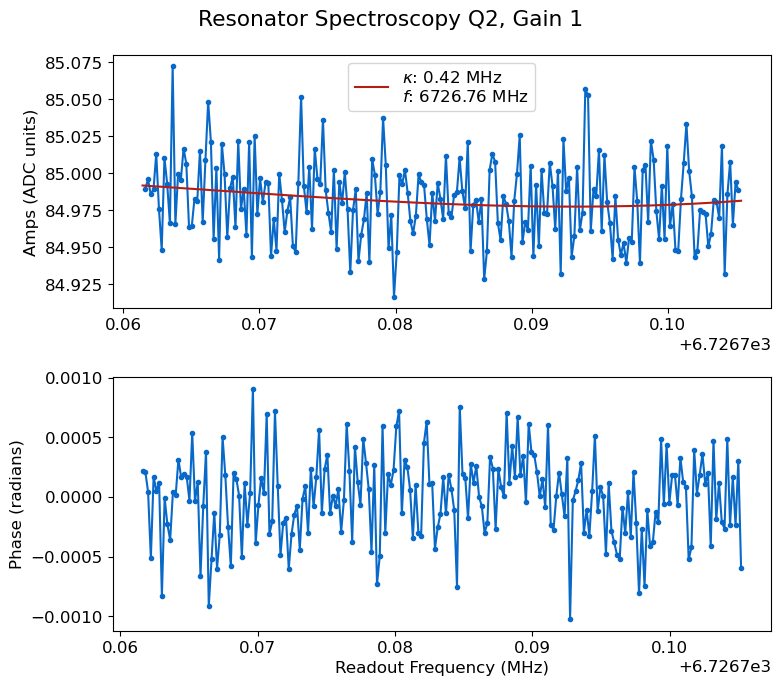

  0%|          | 0/11000 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "C:\_Lib\python\qq\slab_qick_calib\fitting.py", line 399, in fithanger
    pOpt, pCov = sp.optimize.curve_fit(hangerS21func_sloped, xdata, ydata, p0=fitparams, bounds=bounds)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\circu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py", line 1015, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + res.message)
RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.


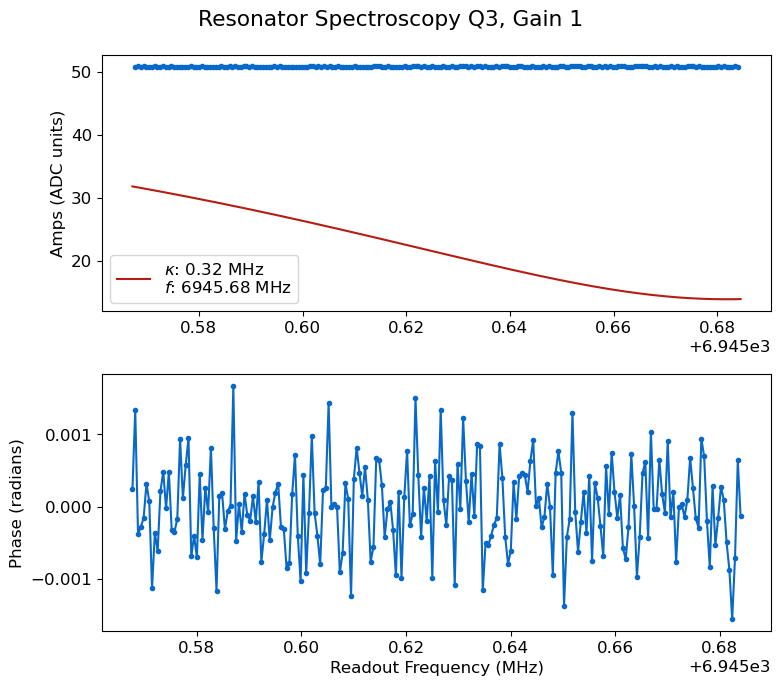

  0%|          | 0/11000 [00:00<?, ?it/s]

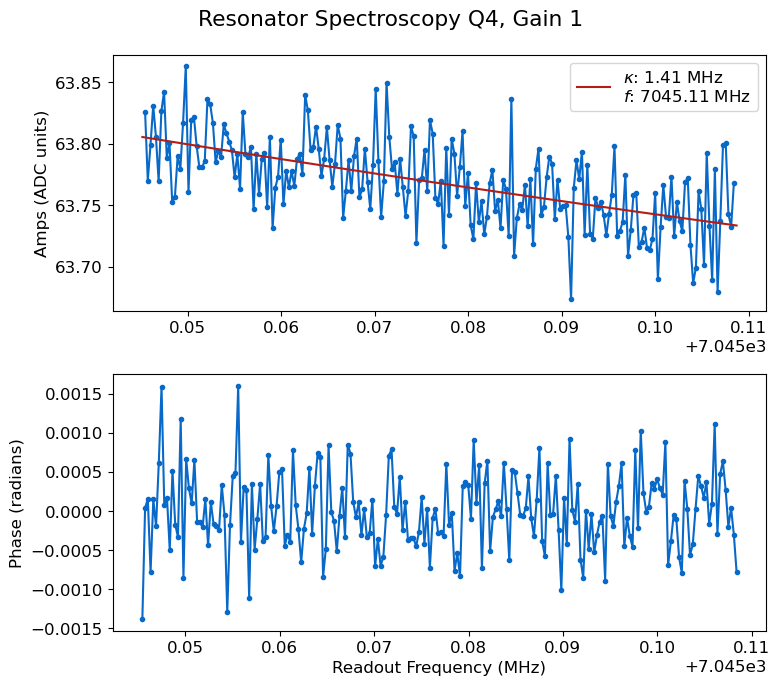

  0%|          | 0/11000 [00:00<?, ?it/s]

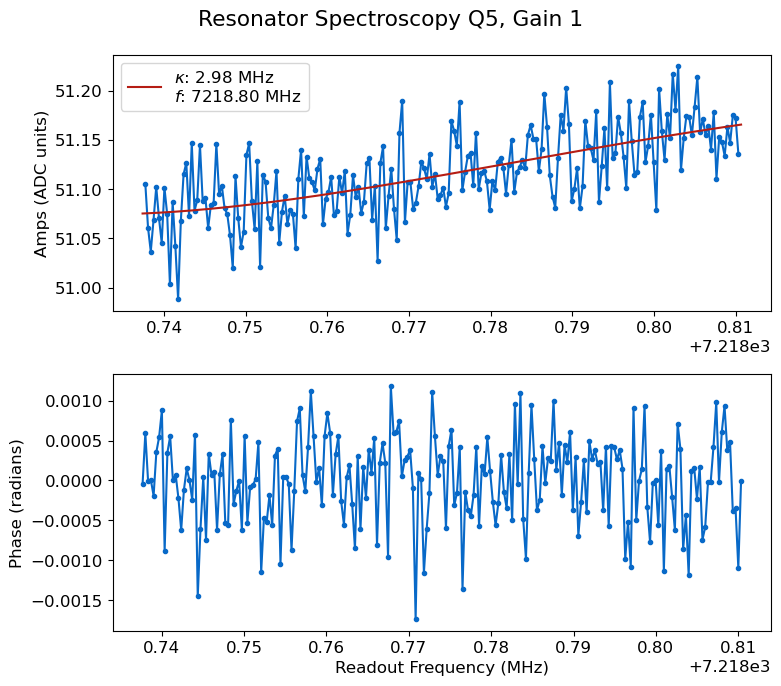

  0%|          | 0/11000 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "C:\_Lib\python\qq\slab_qick_calib\fitting.py", line 399, in fithanger
    pOpt, pCov = sp.optimize.curve_fit(hangerS21func_sloped, xdata, ydata, p0=fitparams, bounds=bounds)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\circu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py", line 1015, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + res.message)
RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.


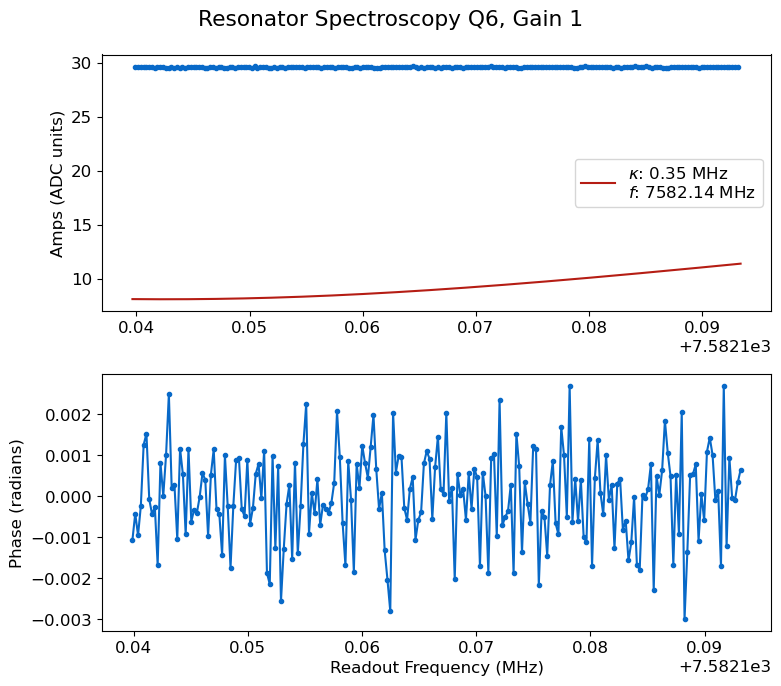

  0%|          | 0/11000 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "C:\_Lib\python\qq\slab_qick_calib\fitting.py", line 399, in fithanger
    pOpt, pCov = sp.optimize.curve_fit(hangerS21func_sloped, xdata, ydata, p0=fitparams, bounds=bounds)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\circu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py", line 1015, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + res.message)
RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.


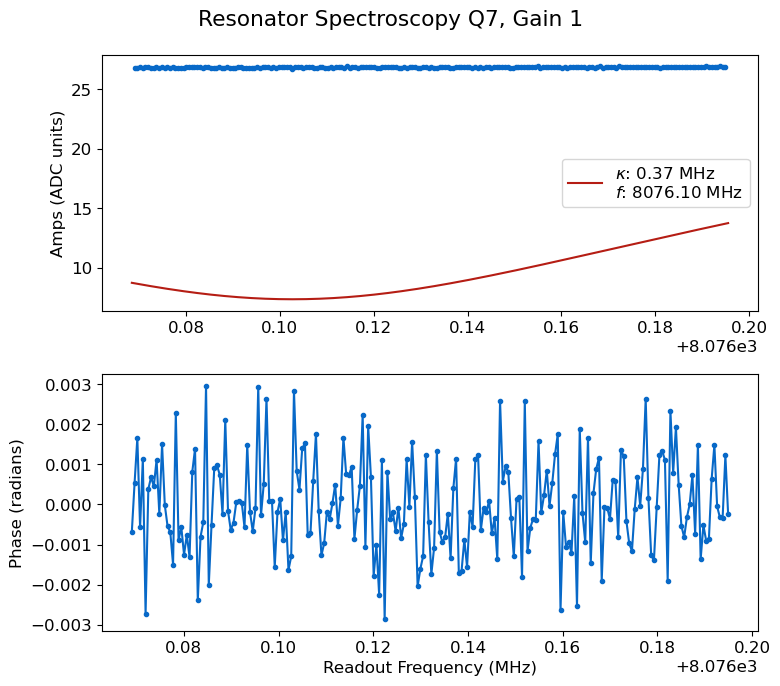

In [32]:
rv =[]
for qi in np.arange(8):
    ro=cfg.device.readout.frequency[qi]
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','reps':50,'gain':1,'length':100,'center':ro-1})
    rv.append(np.mean(rspec.data['amps']))

Text(0.5, 1.0, 'Readout Amplitude RFSoC')

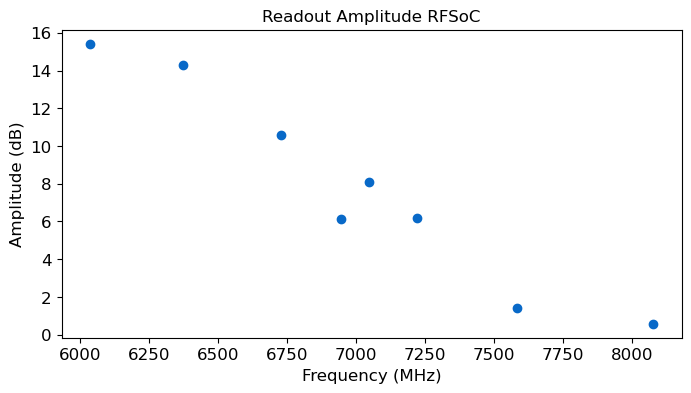

In [ ]:
plt.figure()
plt.plot(np.array(cfg.device.readout.frequency), 20*np.log10(rv)-28, 'o')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (dB)')
plt.title('Readout Amplitude RFSoC')

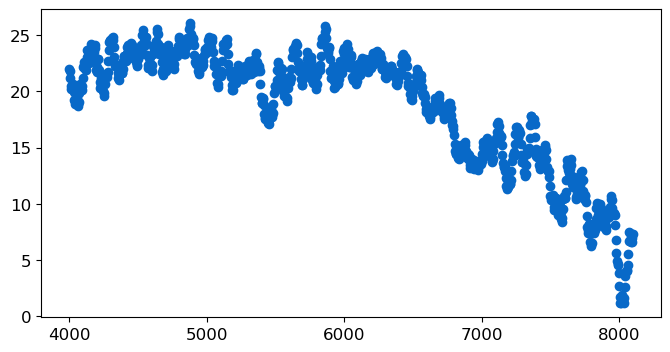

In [53]:
plt.figure()
plt.plot(rspecc.data['xpts'], np.log10(rspecc.data['amps'])*20-21, 'o')

In [ ]:
plt.figure()

fix_phase = np.unwrap(rspec.data['phases']-rspec.data['phases'][0])-fit_params[0]*rspec.data['xpts']
amps = rspec.data['amps']
x = amps*np.cos(fix_phase)
y = amps*np.sin(fix_phase)
plt.plot(x, y, 'o', label='raw data')


## Power sweep

In [ ]:
qi=4
qi_list=[]
gains = [1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
#gains = [0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125]
d=[]
for i, g in enumerate(gains):
    reps = int(np.ceil(4*(2)**i))
    print(reps)
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','long_pulse':True,'reps':reps,'gain':g,'expts':100})
    rspec.update(cfg_dict['cfg_file'])
    d.append(rspec.data['amps'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')
plt.figure()

for i, dd in enumerate(d): 
    plt.semilogy(dd*2**i)
plt.figure()
plt.semilogy(np.array(qi_list[1:-1])*10/1000,'-o')
plt.title(f'Resonator {qi}')

# Final delay

  0%|          | 0/440 [00:00<?, ?it/s]

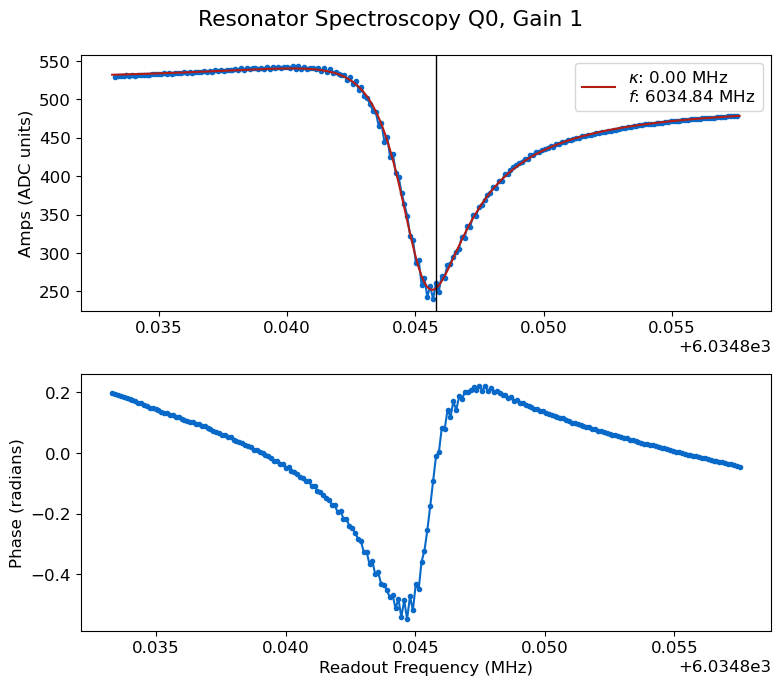

*Set cfg readout 0 frequency to 6034.8457 from 6034.8458*
*Set cfg readout 0 kappa to 0.0037 from 0.0036*
*Set cfg readout 0 qi to 375.4116 from 404.1231*
*Set cfg readout 0 qe to 291.2487 from 287.7806*


  0%|          | 0/440 [00:00<?, ?it/s]

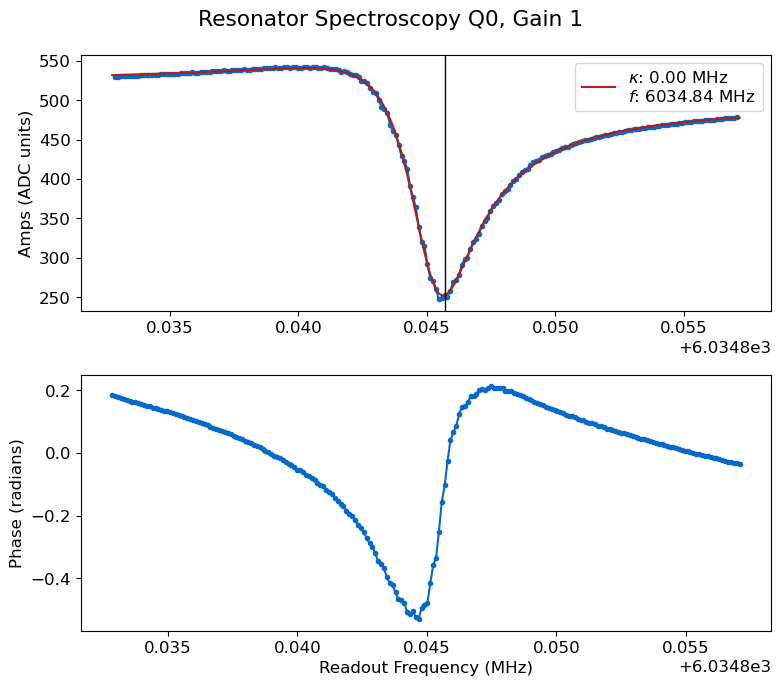

*Set cfg readout 0 frequency to 6034.8455 from 6034.8457*
*Set cfg readout 0 kappa to 0.0037 from 0.0037*
*Set cfg readout 0 qi to 377.3768 from 375.4116*
*Set cfg readout 0 qe to 291.1369 from 291.2487*


  0%|          | 0/440 [00:00<?, ?it/s]

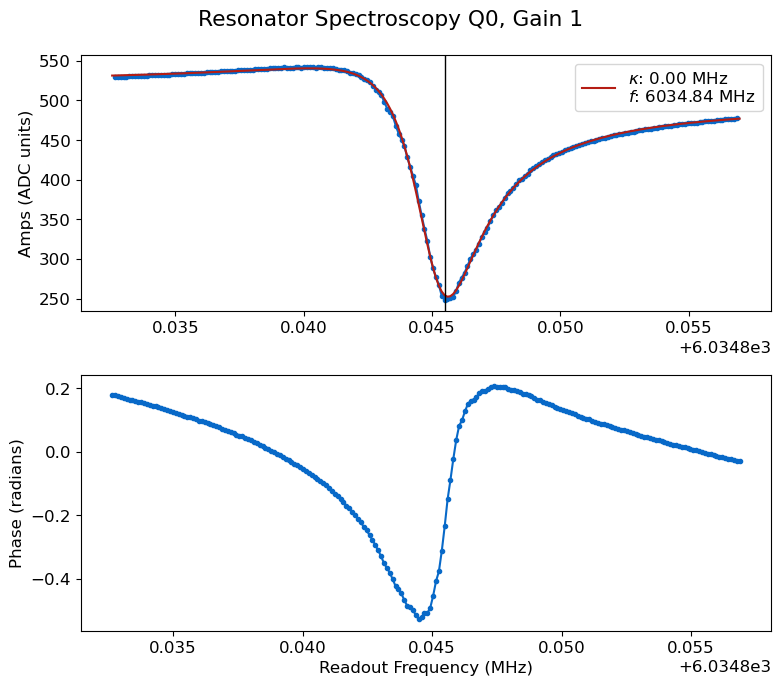

*Set cfg readout 0 frequency to 6034.8455 from 6034.8455*
*Set cfg readout 0 kappa to 0.0037 from 0.0037*
*Set cfg readout 0 qi to 376.4753 from 377.3768*
*Set cfg readout 0 qe to 292.0005 from 291.1369*


  0%|          | 0/440 [00:00<?, ?it/s]

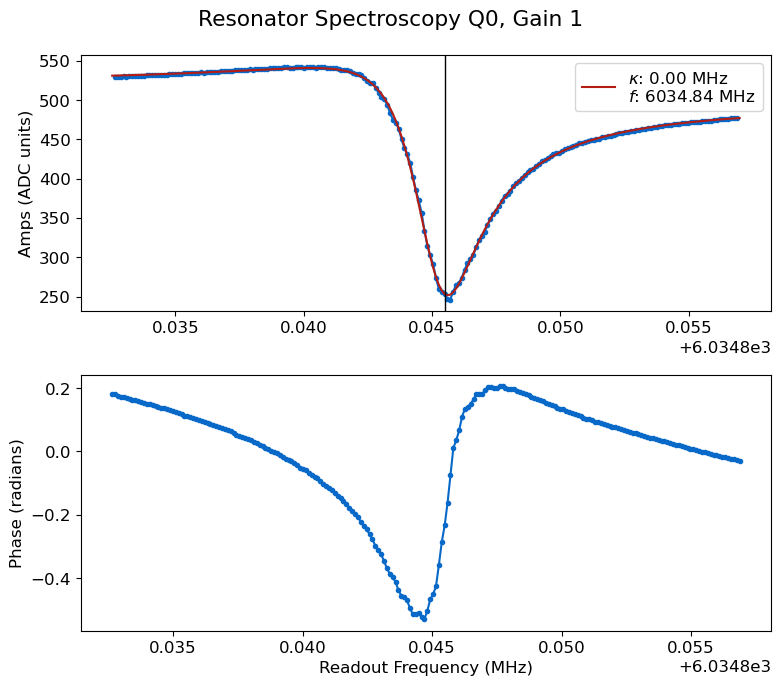

*Set cfg readout 0 frequency to 6034.8457 from 6034.8455*
*Set cfg readout 0 kappa to 0.0037 from 0.0037*
*Set cfg readout 0 qi to 379.207 from 376.4753*
*Set cfg readout 0 qe to 291.0227 from 292.0005*


  0%|          | 0/440 [00:00<?, ?it/s]

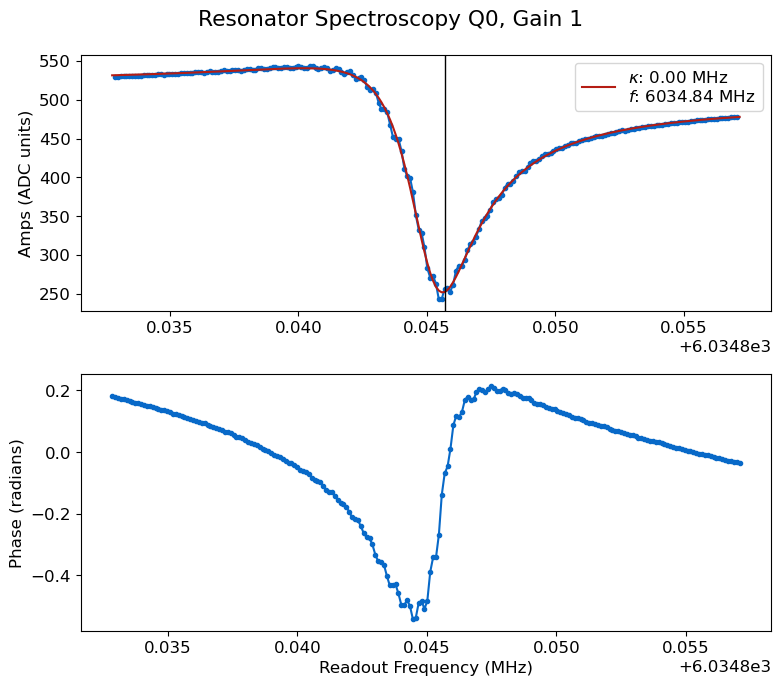

*Set cfg readout 0 frequency to 6034.8456 from 6034.8457*
*Set cfg readout 0 kappa to 0.0037 from 0.0037*
*Set cfg readout 0 qi to 377.2114 from 379.207*
*Set cfg readout 0 qe to 290.275 from 291.0227*


  0%|          | 0/440 [00:00<?, ?it/s]

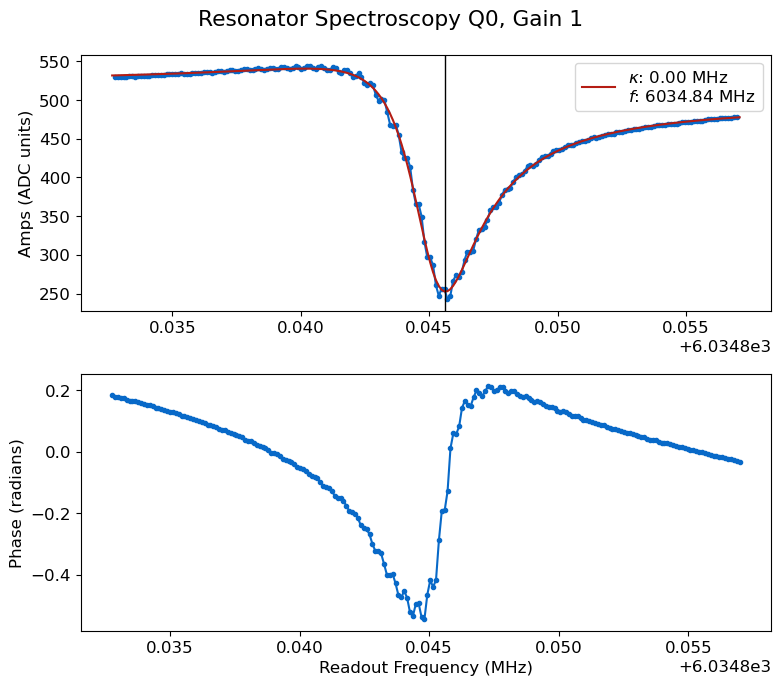

*Set cfg readout 0 frequency to 6034.8457 from 6034.8456*
*Set cfg readout 0 kappa to 0.0037 from 0.0037*
*Set cfg readout 0 qi to 375.0134 from 377.2114*
*Set cfg readout 0 qe to 291.4772 from 290.275*


<Figure size 800x400 with 0 Axes>

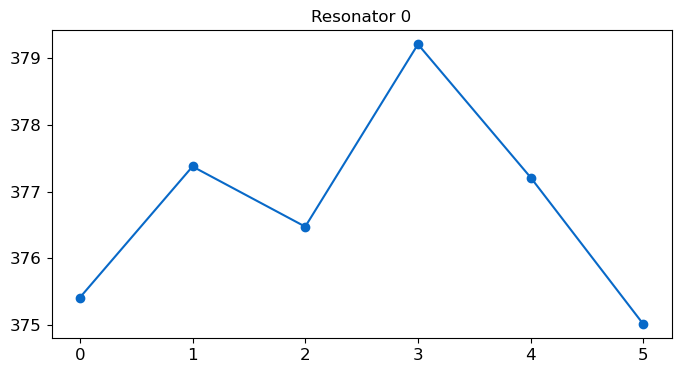

<Figure size 800x400 with 0 Axes>

In [ ]:
qi=0
qi_list=[]
final_delay = [2000,500,100,20,5,1]
d=[]
for i, f in enumerate(final_delay):
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','gain':1,'final_delay':f,'reps':2})
    rspec.update(cfg_dict['cfg_file'])
    d.append(rspec.data['amps'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')
plt.figure()

for i, dd in enumerate(d): 
    plt.semilogy(dd, label=f'{len[i]} us')
plt.legend()
plt.figure()
plt.semilogy(np.array(qi_list[1:-1])*10/1000,'-o',)
plt.title(f'Resonator {qi}')

# Ave time

  0%|          | 0/2200 [00:00<?, ?it/s]

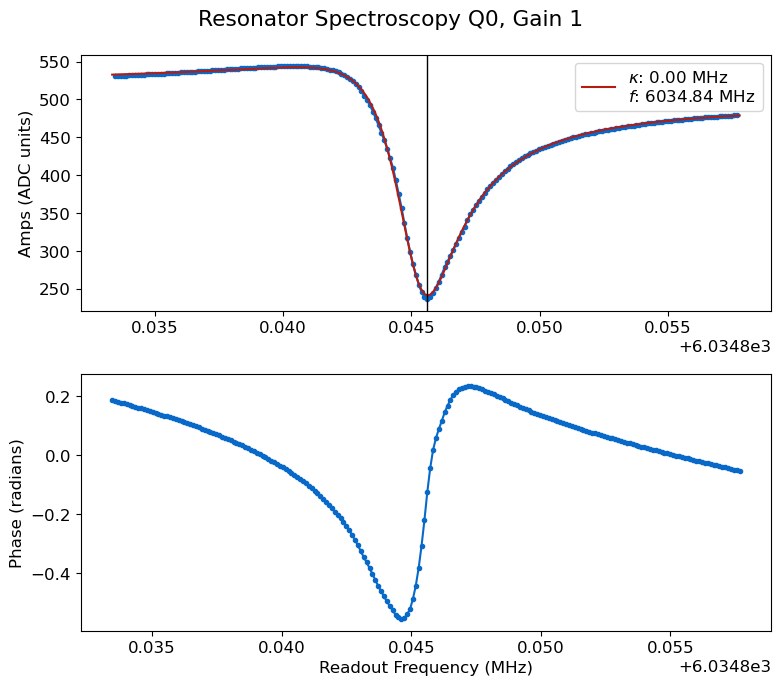

  0%|          | 0/2200 [00:00<?, ?it/s]

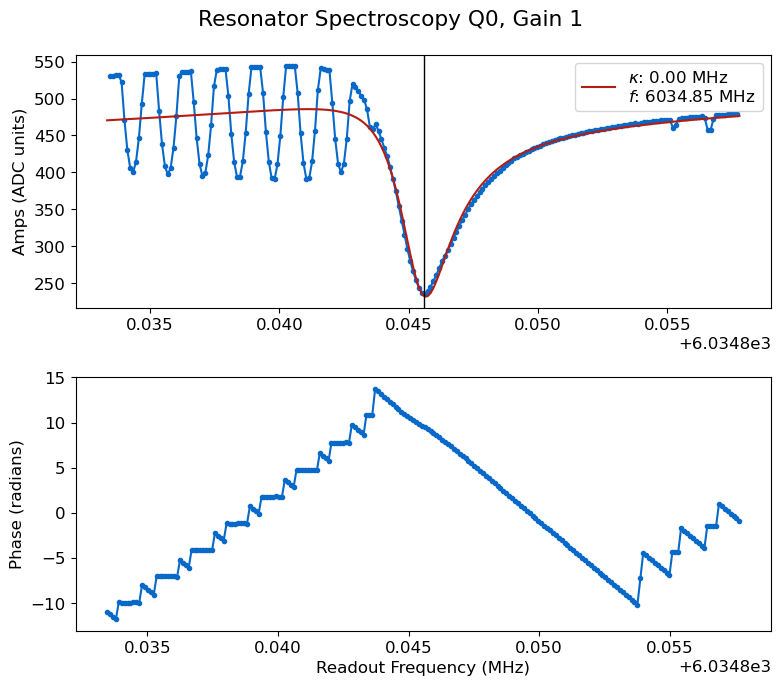

  0%|          | 0/2200 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "C:\_Lib\python\qq\slab_qick_calib\fitting.py", line 400, in fithanger
    pOpt, pCov = sp.optimize.curve_fit(hangerS21func_sloped, xdata, ydata, p0=pOpt, bounds=bounds)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\circu\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py", line 1015, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + res.message)
RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.


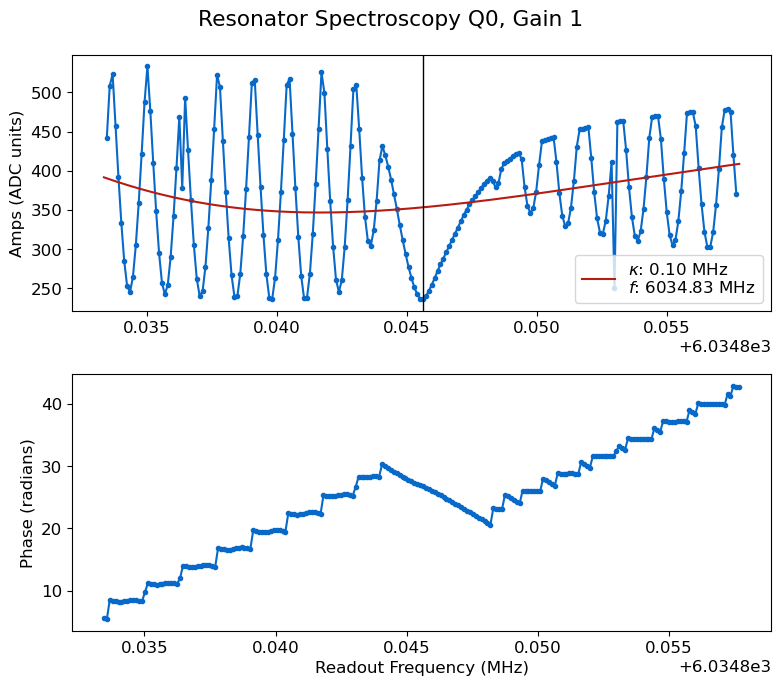

  0%|          | 0/2200 [00:00<?, ?it/s]

In [ ]:
qi=0
qi_list=[]
#len = [100,200,500,1000,2000,5000,10000,12000]
len = [13000]

d=[]
for i, l in enumerate(len):
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','gain':1,'final_delay':150,'reps':10,'length':l})
    #rspec.update(cfg_dict['cfg_file'])
    d.append(rspec.data['amps'])
    qi_list.append(rspec.data['fit'][1])

plt.figure()
plt.plot(qi_list,'-o')
plt.title(f'Resonator {qi}')


Text(0.5, 1.0, 'Resonator 0')

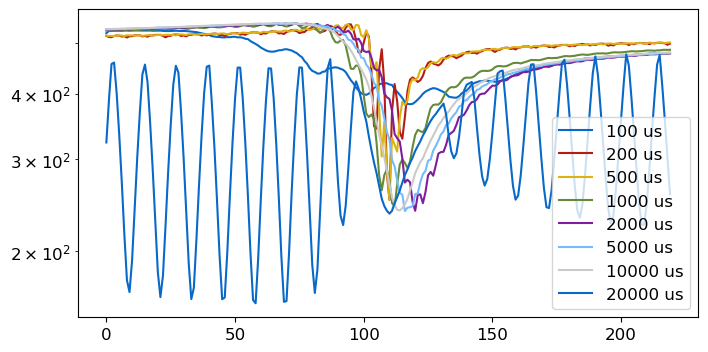

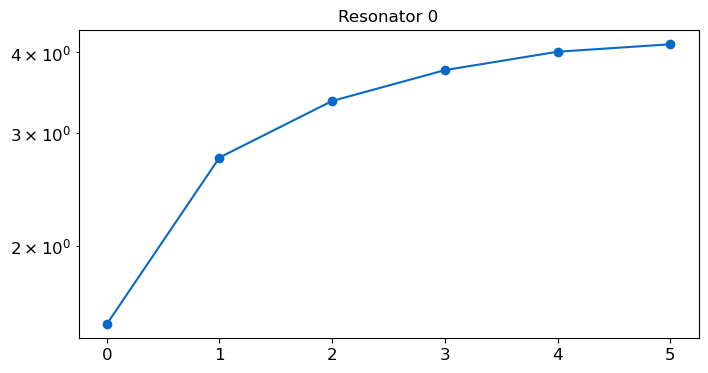

In [ ]:
plt.figure()
for i, dd in enumerate(d): 
    plt.semilogy(dd, label=f'{len[i]} us')
plt.legend()
plt.figure()
plt.semilogy(np.array(qi_list[1:-1])*10/1000,'-o',)
plt.title(f'Resonator {qi}')

In [ ]:
import copy

cfg = config.load(cfg_path)
rspec.data['freqs']=rspec.data['xpts']*1e6

fix_phase = rspec.data['phases']-cfg['device']['readout']['phase_inc']*rspec.data['xpts']
data = copy.deepcopy(rspec.data)
data['phases']= np.unwrap(fix_phase)-np.unwrap(fix_phase)[0]
data = ResonatorData.fit_phase(data)
data['amps']=20*np.log10(data['amps'])
output = ResonatorFitter.fit_resonator(data, 'hi', os.getcwd(), plot=True, fix_freq=False)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(data['xpts'], data['amps'], 'o', label='raw data')
ax[1].plot(rspec.data['xpts'], rspec.data['amps'], 'o', label='raw data')

plt.figure()
x = data['amps']*np.cos(data['phases'])
y = data['amps']*np.sin(data['phases'])
plt.plot(x, y, 'o', label='raw data')

output = ResonatorFitter.fit_resonator(data, 'hi', os.getcwd(), plot=True, fix_freq=False)

fig, ax = plt.subplots(3,1, figsize=(6,8), sharex=True)
ax[0].plot(rspec.data['freqs'], rspec.data['phases'])
ax[1].plot(rspec.data['freqs'], fix_phase-np.mean(fix_phase))
ax[2].plot(rspec.data['freqs'], np.unwrap(fix_phase)-np.unwrap(fix_phase)[0])
fig.tight_layout()

# Power sweep

In [ ]:
# 
freq_list =np.array([6034.8476, 6374.5886,6727.7838, 6946.6281, 7046.077, 7219.7741, 7583.168,8077.1325])*1e6
cfg = config.load(cfg_path)
base_path = r'G:/My Drive/Projects/Materials/Data/250503-ResSil5Ta'

if not os.path.exists(base_path):
    os.makedirs(base_path)
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'single','base_path':base_path, 'nvals':21,"pow_start":-0,"avg_corr":0.3,'npoints':23}
custom_config = {"freqs":np.array(freq_list),
                  "att":73,
                  'type':'rfsoc',
                  'base_path':base_path, 
                  "pow_start":0,
                  "avg_corr":0.1,
                  "db_corr":12,
                  "kappa_start":8000,
                  "phase_inc":cfg['device']['readout']['phase_inc'],
                  "bandwidth":85,
                  "npoints":28,
                  "span_inc":6.6,
                  'attn_channel':8,
                  'attn_id':attn_id,
                  'nvals':6}
    # Update default config with custom values
cc = vna_measurement.get_default_power_sweep_config(custom_config)

results = vna_measurement.power_sweep_rfsoc(cc, cfg_dict)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [117]:
config

{'base_path': 'G:/My Drive/Projects/Materials/Data/250503-ResSil5Ta',
 'folder': 'power_sweep_20250503_111132',
 'freqs': array([6.0348e+09, 6.3746e+09, 6.7278e+09, 6.9466e+09, 7.0461e+09,
        7.2198e+09, 7.5832e+09, 8.0771e+09]),
 'span_inc': 10,
 'kappa_start': 30000,
 'nvals': 21,
 'pow_start': 0,
 'pow_inc': -5,
 'npoints': 201,
 'npoints1': 10,
 'npoints2': 27,
 'bandwidth': 100,
 'averages': 1,
 'att': 50,
 'type': 'rfsoc',
 'freq_0': 6,
 'db_slope': 4,
 'avg_corr': 10000.0,
 'db_corr': 12,
 'phase_inc': [-1130.8379223790125]}